Base de Dados analisado - Kaggle

https://www.kaggle.com/arjunbhasin2013/ccdata

---



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster  import KMeans
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
creditcards_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ciencia_De_Dados_para_Negocioss/Arquivos/Bases de dados/Marketing_data.csv')

In [4]:
creditcards_df.shape

(8950, 18)

In [5]:
creditcards_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
# Observando o tipo de dados
creditcards_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
# Visualizar  estatistica dos dados
creditcards_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
# Encontrar dados sobre um cliente especifico (cliente que maior fez compra a vista)
creditcards_df[creditcards_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [9]:
# Buscando o cliente que fez uma maior saque do limite do cartão de crédito
creditcards_df['CASH_ADVANCE'].max()

47137.21176

In [10]:
creditcards_df[creditcards_df['CASH_ADVANCE'] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


## VISUALIZAÇÃO E EXPLORAÇÃO DOS DADOS

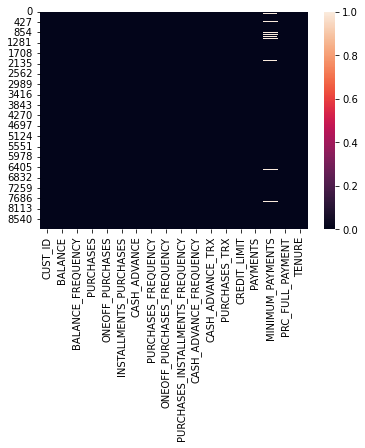

In [11]:
# Verificando se há registros nulos na tabela
sns.heatmap(creditcards_df.isnull()); # As barrinhas são os dados nulos encontrados

In [12]:
# Fazendo a contagem dos elementos nulos existentes
creditcards_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [13]:
creditcards_df['MINIMUM_PAYMENTS'].mean()

864.2065423050828

In [14]:
# Realizando o tratamentos nos dados para não gerar erros no algoritmo
# Preenchendo os dados nulos e trabalando com a média dos dados

creditcards_df.loc[(creditcards_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcards_df['MINIMUM_PAYMENTS'].mean()

In [15]:
creditcards_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [16]:
creditcards_df.loc[(creditcards_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcards_df['CREDIT_LIMIT'].mean()

In [17]:
creditcards_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

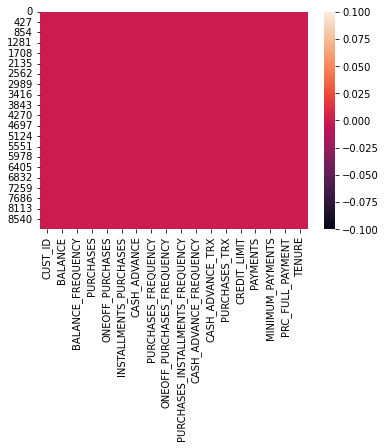

In [18]:
sns.heatmap(creditcards_df.isnull());

In [19]:
# Verificando se existe dados duplicados
creditcards_df.duplicated().sum()

0

In [20]:
# Apagando o identificado do cleinte pois não é relevante para o agrupamento
creditcards_df.drop('CUST_ID', axis = 1, inplace = True)

In [21]:
creditcards_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [22]:
creditcards_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

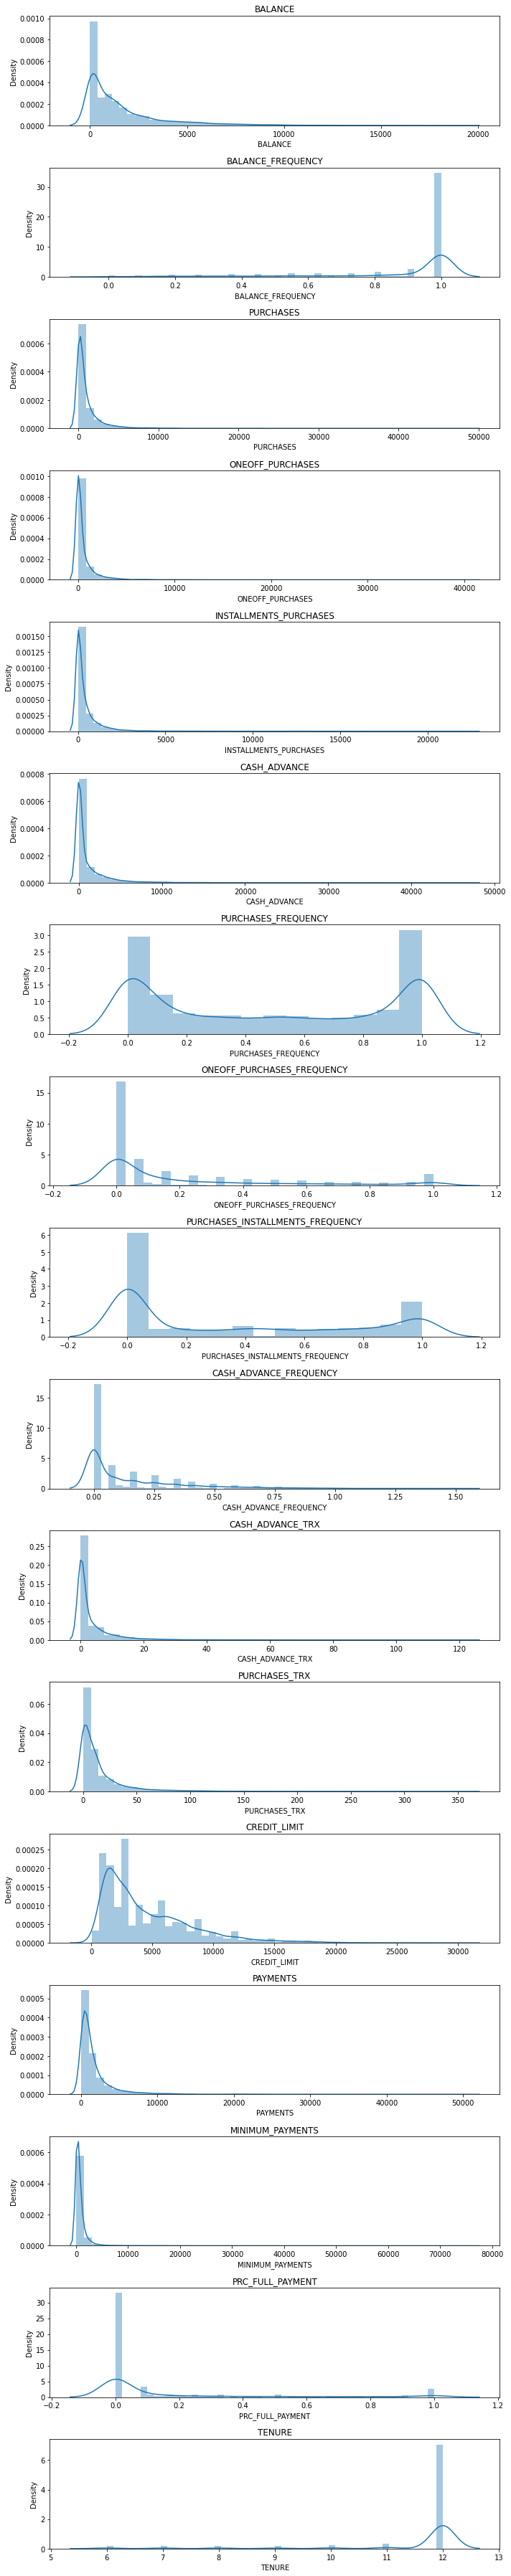

In [23]:
plt.figure(figsize=(10,50))
for i in range(len(creditcards_df.columns)):
  plt.subplot(17, 1, i + 1)  # Sub gráfico, gerando 17 gráfico, ou seja, um grafico por linha, 17 linhas e uma coluna juntamento com o ID do gráfico
  sns.distplot(creditcards_df[creditcards_df.columns[i]], kde = True) #gerando o histograma, kde para geração da linha
  plt.title(creditcards_df.columns[i]) # definindo um titulo para o gráfico
plt.tight_layout(); # isso fará que as palavras não fiquem em cima uma as outras

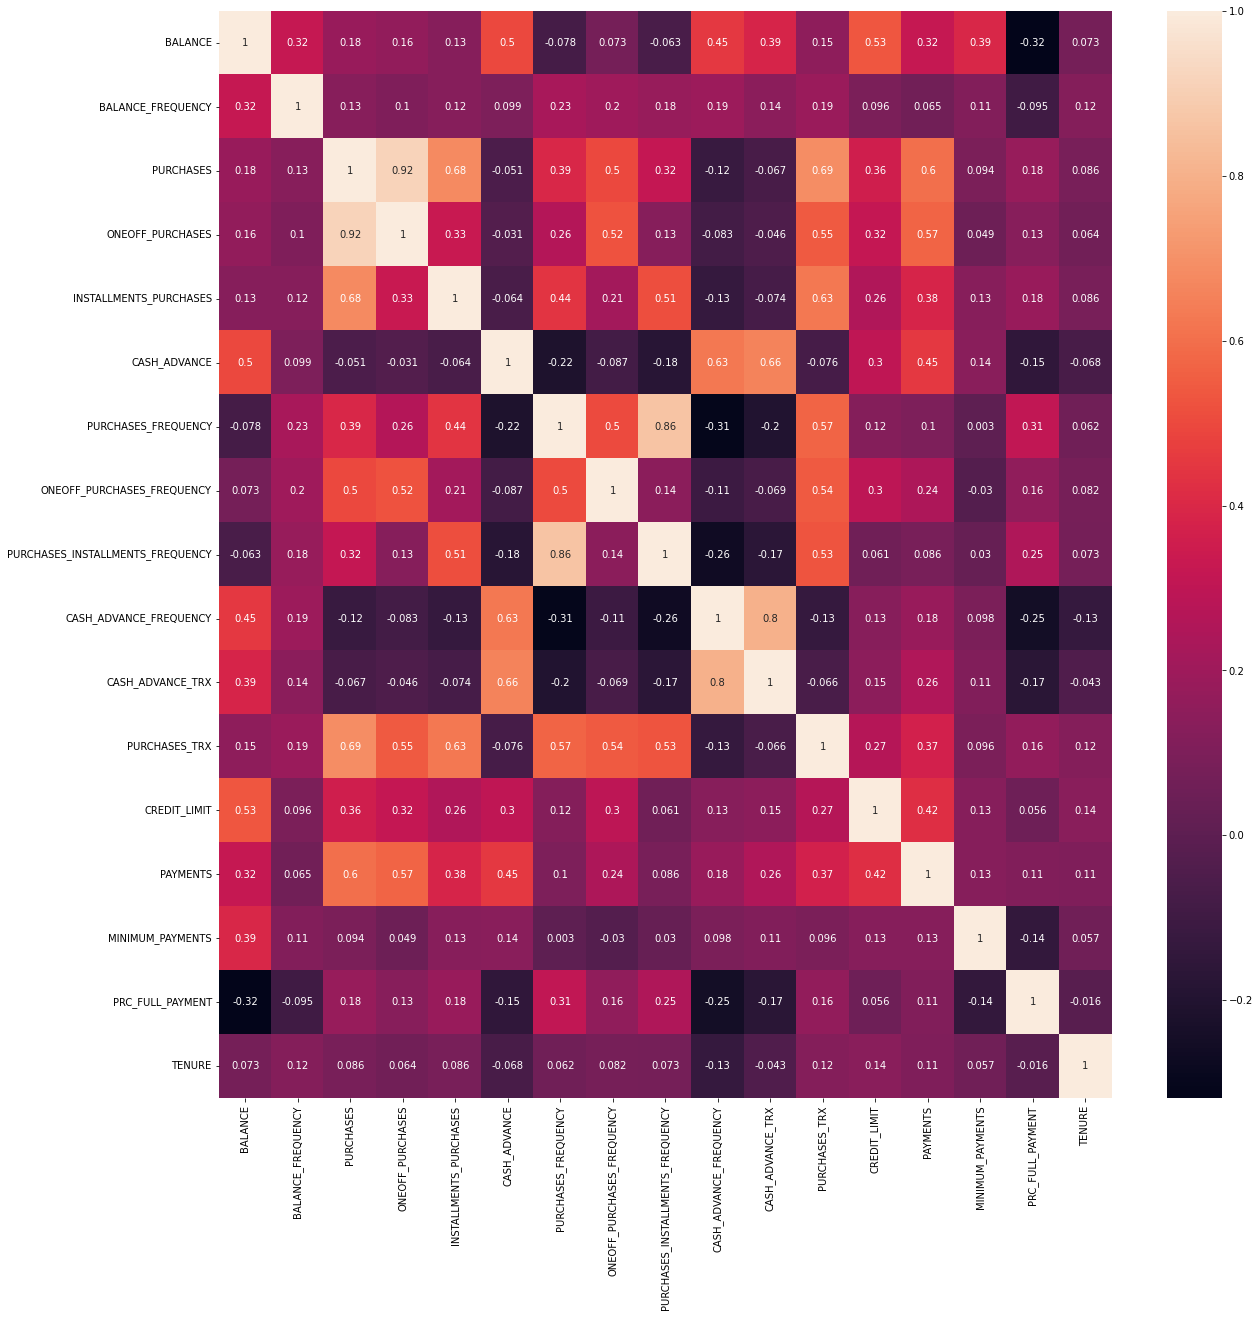

In [24]:
# Gerar a matriz de correlações
correlations = creditcards_df.corr()

# gerando o mapa de calor
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

## K-MEANS => PARA ATUAR COM AGRUPAMENTO DE DADOS
Algoritmos não supervisionado (clustering - agrupamento)


### QUAL A TÉCNICA PARA SABER QUANTOS GRUPOS DE CLUSTER UMA BASE DE DADOS PRECISA SER AGRUPADO OU QUE PODE SER AGRUPADO?

UTILIZANDO O ELBOW METHOD (MÉTODO DO COTOVELO)

In [25]:
# Descobrindo o número ideal de clusters nessa base de dados

# visualizando os valores minimos e máximos
min(creditcards_df['BALANCE']), max(creditcards_df['BALANCE'])

(0.0, 19043.13856)

In [26]:
# Colocar os dados em escala
scaler = StandardScaler()
creditcards_df_scaled = scaler.fit_transform(creditcards_df)

In [27]:
# Substituido o nome da coluna BALANCE para o  número do indice do dataset que no caso está no "0"
min(creditcards_df_scaled[0]), max(creditcards_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [28]:
creditcards_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [29]:
# nesse modelo trabalharemos até 20 clusters
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcards_df_scaled)
  wcss_1.append(kmeans.inertia_)

In [30]:
print(wcss_1)

[152149.99999999983, 127784.92103208725, 111986.69806610125, 99073.93826774803, 91502.3834896274, 84851.13240432573, 79576.93054527177, 76050.7150080373, 69834.00125707638, 66462.0959569423, 63618.91800125046, 61352.65040230618, 59166.335114340414, 57502.421744185864, 55837.819790278285, 54528.506364945664, 53216.08744815517, 52022.183179134554, 50642.18497441648]


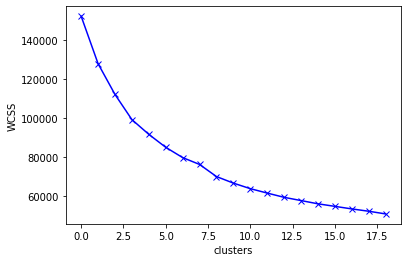

In [31]:
# gerando o gráfico do wcss_1 contendo os números de clusters
plt.plot(wcss_1, 'bx-')
plt.xlabel('clusters')
plt.ylabel('WCSS');

In [32]:
# Provavel que seja utilizado de 7 a 8 clusters no dataset

# Agrupamento com K-means

In [33]:
kmeans = KMeans(n_clusters=8) # testaremos com 8 clusters
kmeans.fit(creditcards_df_scaled) # fit => ira fara todo o treinamento do algoritmo kmeans de encontrar o centroide, calcular as médias até que ele consiga colocar cada um dos registros
labels = kmeans.labels_

In [34]:
# visualizando que grupo cada cliente pertence e o todos de clientes
labels, len(labels)

(array([6, 2, 0, ..., 7, 7, 7], dtype=int32), 8950)

In [35]:
# Checando quantos clientes existem em cada grupo
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([1073, 2009,  901,   30, 1181,  415, 2717,  624]))

Centroide nada mais é do que a média de cada grupo

Cada grupo tem seu centroide

In [36]:
# Verificando a média de cada clusters
kmeans.cluster_centers_

array([[-1.70776349e-01,  3.91402941e-01,  4.69685662e-01,
         6.15116043e-01, -1.96576535e-02, -3.40421827e-01,
         9.52597852e-01,  1.90394614e+00,  8.50355454e-02,
        -4.21229209e-01, -3.37181627e-01,  5.33706047e-01,
         3.84663938e-01,  9.51084152e-02, -1.66105577e-01,
         4.31047399e-01,  2.61790217e-01],
       [-3.61075843e-01,  3.35644824e-01, -3.17133159e-02,
        -2.40650845e-01,  3.66940325e-01, -3.61904404e-01,
         1.00029469e+00, -3.78832166e-01,  1.21557582e+00,
        -4.70903578e-01, -3.57250998e-01,  1.96369395e-01,
        -2.57803168e-01, -2.12705471e-01, -3.13941183e-02,
         3.12007820e-01,  2.56906378e-01],
       [ 1.66119757e+00,  3.96464693e-01, -2.24545961e-01,
        -1.61123398e-01, -2.34993584e-01,  1.96364861e+00,
        -4.83992816e-01, -2.12852768e-01, -4.21733166e-01,
         1.89328978e+00,  1.88584926e+00, -2.73550167e-01,
         1.01371198e+00,  7.78287304e-01,  5.38748175e-01,
        -3.96638601e-01,  7.8

In [37]:
# Criando um dataframe com os dados
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcards_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.170776,0.391403,0.469686,0.615116,-0.019658,-0.340422,0.952598,1.903946,0.085036,-0.421229,-0.337182,0.533706,0.384664,0.095108,-0.166106,0.431047,0.261790
1,-0.361076,0.335645,-0.031713,-0.240651,0.366940,-0.361904,1.000295,-0.378832,1.215576,-0.470904,-0.357251,0.196369,-0.257803,-0.212705,-0.031394,0.312008,0.256906
2,1.661198,0.396465,-0.224546,-0.161123,-0.234994,1.963649,-0.483993,-0.212853,-0.421733,1.893290,1.885849,-0.273550,1.013712,0.778287,0.538748,-0.396639,0.078811
3,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
4,-0.700895,-2.142861,-0.310778,-0.235813,-0.301486,-0.320128,-0.554934,-0.445518,-0.437471,-0.521151,-0.376187,-0.418846,-0.174450,-0.191590,-0.256623,0.288909,0.203133
5,0.914951,0.466001,2.281055,1.748595,2.181104,-0.181917,1.160988,1.581059,1.244271,-0.299160,-0.185117,2.814682,1.231343,1.306654,0.452591,0.300159,0.333671
6,0.002194,0.402744,-0.358282,-0.243565,-0.399570,-0.104786,-0.856037,-0.403826,-0.751564,0.088579,-0.039324,-0.483272,-0.314839,-0.254996,-0.012492,-0.455973,0.273125
7,-0.334412,-0.350224,-0.289845,-0.216418,-0.287373,0.068220,-0.206343,-0.289911,-0.226768,0.310070,0.001111,-0.388770,-0.565777,-0.392951,-0.208632,0.012282,-3.200691


## 4 Grupos com potências interesses para o Banco

* Grupo 0: Clientes que pagam pouco juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (105) e não sacam muito dinheiro do limite do cartão (301). 23% de pagamento da fatura completa do cartão de crédito
* Grupo 3 (que apresenta mais risco ao banco): usam o cartão de crédito como "emprestimos" (setor mais lucrativo para o banco), possuem muito dinheiro  na conta corrente (5041) e sacam muito dinheiro do cartão de crédito (5168), compram pouco (0.29) e usam bastante o limite do cartão para saques (0.51). Pagam muito pouco a fatura completa (0.03)
* Grupo 6 (VIP/Prime): Limite do cartão alto (16043) e o mais alto percentual de pagamento da fatura completa (0.51). Aumentar o limite do cartão e o hábito de compras
* Grupo 7 (clientes novos): clientes mais novos (7.23) e que mantém pouco dinheiro na conta corrente (867)

In [38]:
# Criando o caminho inverso, ira retornar os valores originais
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcards_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1209.018273,0.969990,2006.695489,1613.404017,393.291473,264.990639,0.872674,0.770442,0.398233,0.050852,0.947810,27.975769,5894.014234,2008.473395,477.104502,0.279789,11.867661
1,812.925939,0.956782,935.448845,193.006257,742.887227,219.940672,0.891817,0.089445,0.847538,0.040912,0.810851,19.590841,3556.456049,1117.382354,791.043874,0.244972,11.861125
2,5022.117340,0.971190,523.458927,325.005531,198.565863,5096.733971,0.296101,0.138960,0.196830,0.514011,16.118363,7.910398,8182.748391,3986.209337,2119.736439,0.037705,11.622788
3,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
4,105.621983,0.369647,339.222252,201.036283,138.437282,307.546757,0.267629,0.069551,0.190575,0.030857,0.681626,4.298899,3859.728573,1178.510733,266.156657,0.238216,11.789162
5,3468.868810,0.987662,5876.713855,3494.746651,2383.412988,597.382207,0.956311,0.674118,0.858942,0.075279,1.985542,84.672289,8974.578313,5515.780504,1918.951376,0.241506,11.963855
6,1569.041707,0.972677,237.729363,188.169901,49.741805,759.129053,0.146782,0.081988,0.065747,0.152870,2.980472,2.697494,3348.937607,994.954457,835.094945,0.020350,11.882830
7,868.425061,0.794306,383.947163,233.228045,151.199888,1121.931504,0.407535,0.115972,0.274314,0.197192,3.256410,5.046474,2435.920592,595.590018,377.998784,0.157307,7.233974


In [39]:
# Verificado o total de labels
labels, len(labels)

(array([6, 2, 0, ..., 7, 7, 7], dtype=int32), 8950)

In [40]:
# Adicionando cada um dos grupos para cada um dos clientes
# Criando um novo dataframe para realizarmos a concatenação com o formato de dicionário, com o atributo 'cluster' e passamos o label concatenando com as colunas "axis=1"
creditcards_df_cluster = pd.concat([creditcards_df, pd.DataFrame({'cluster': labels})], axis=1)
creditcards_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,6
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,6
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,6


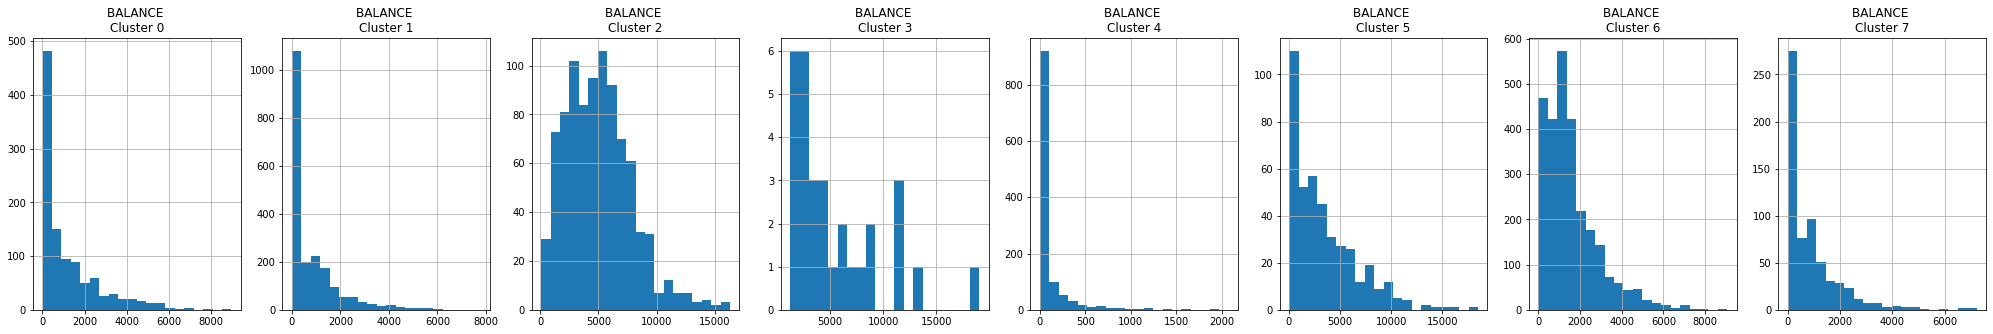

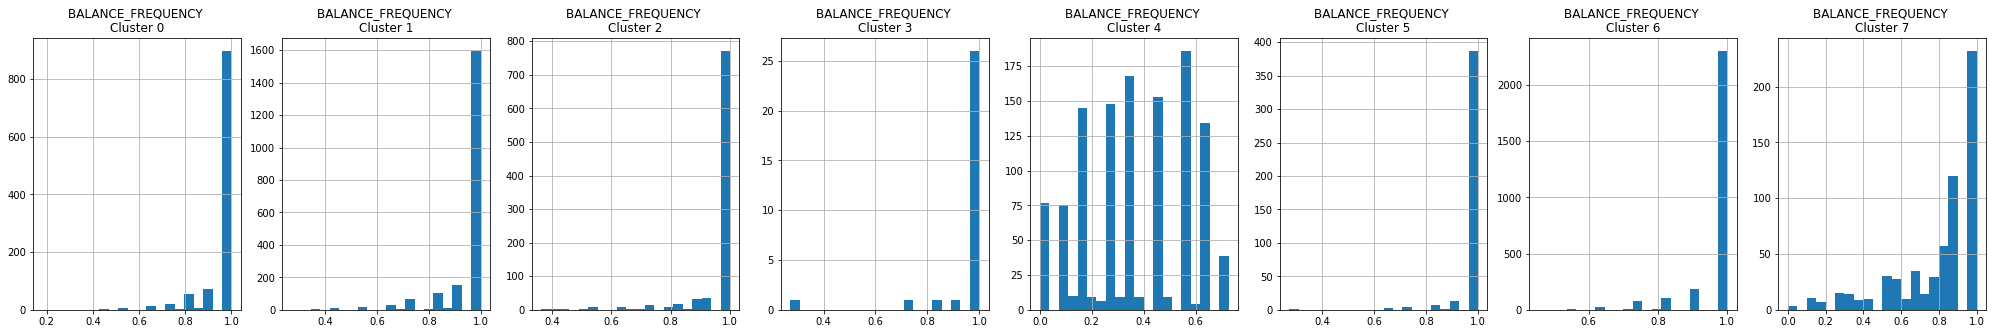

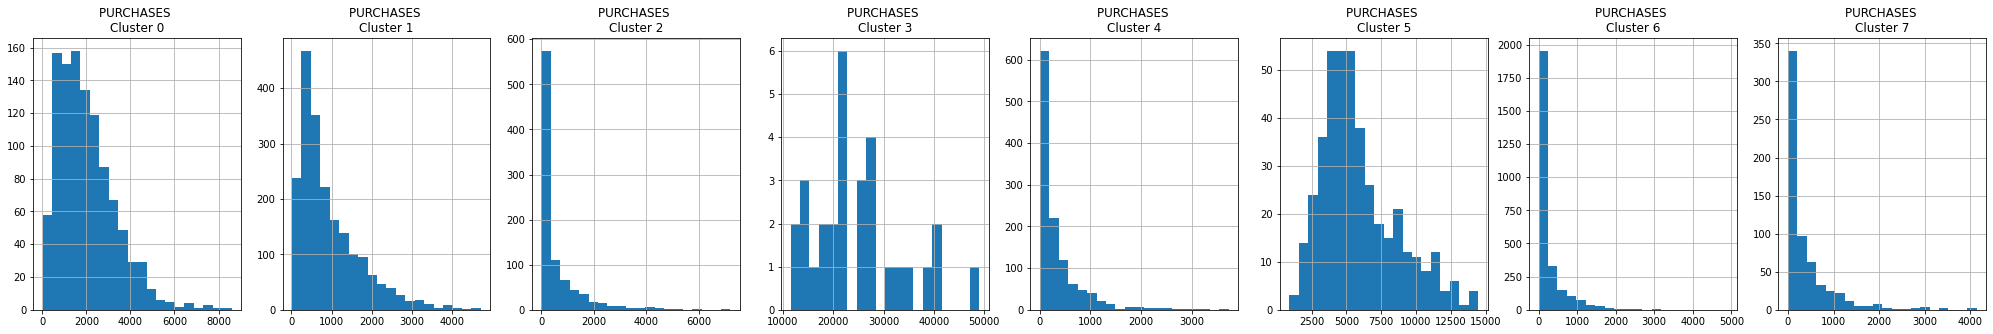

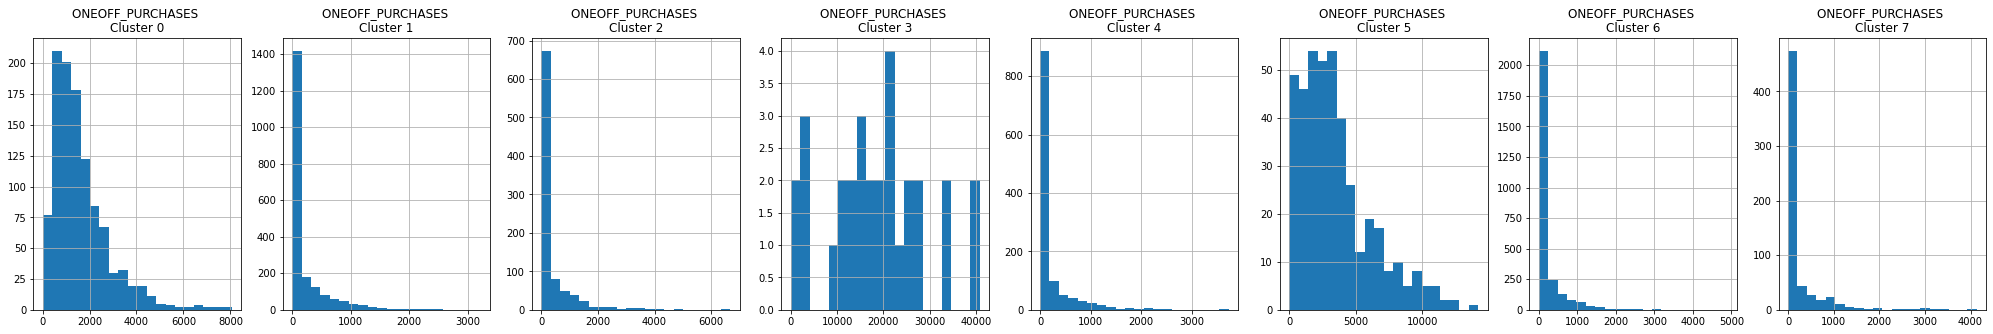

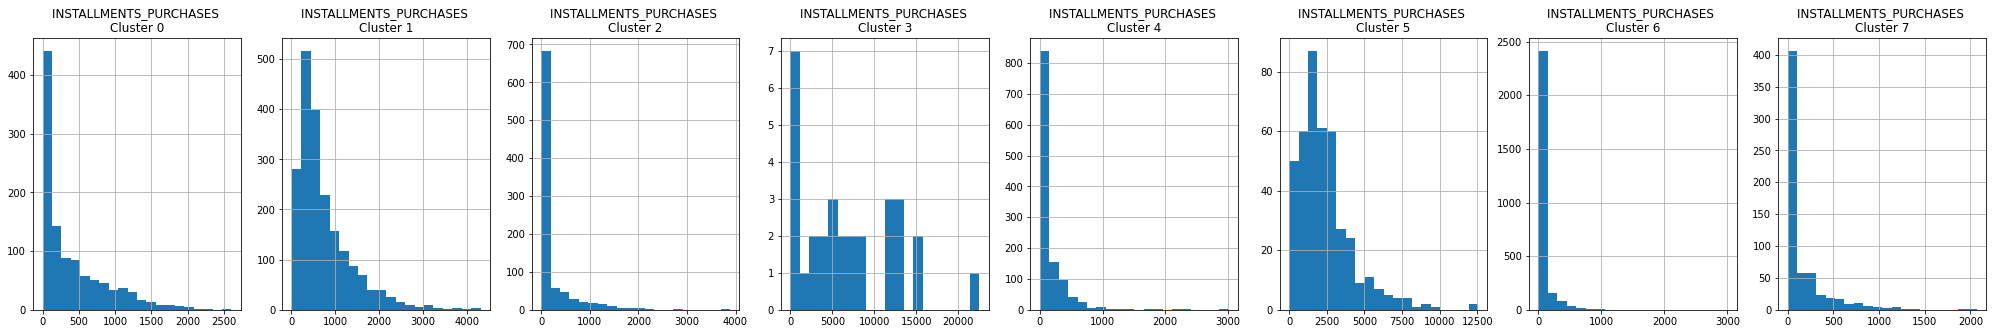

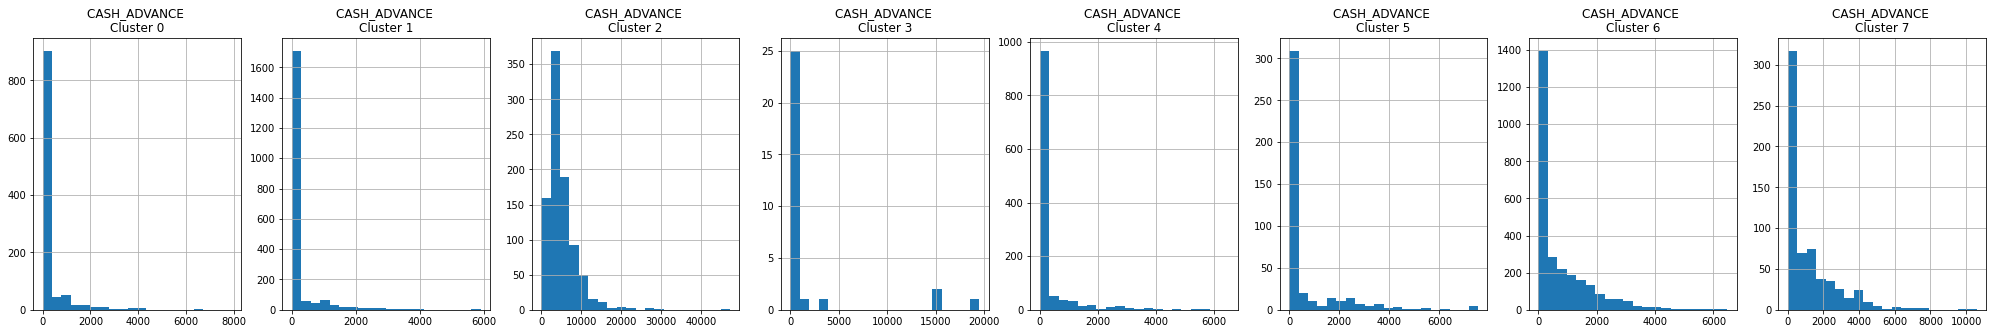

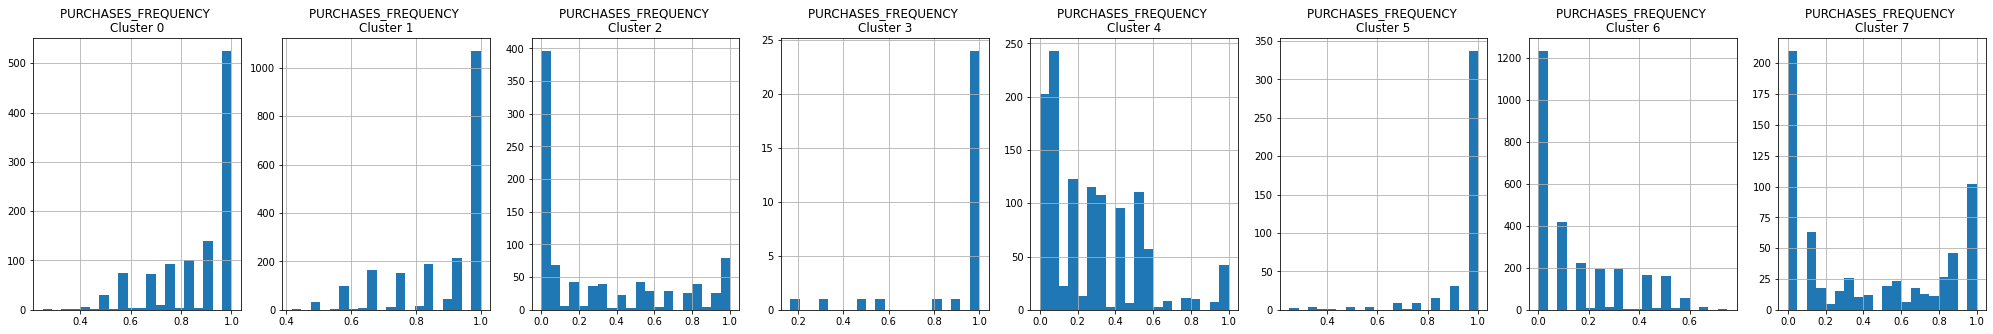

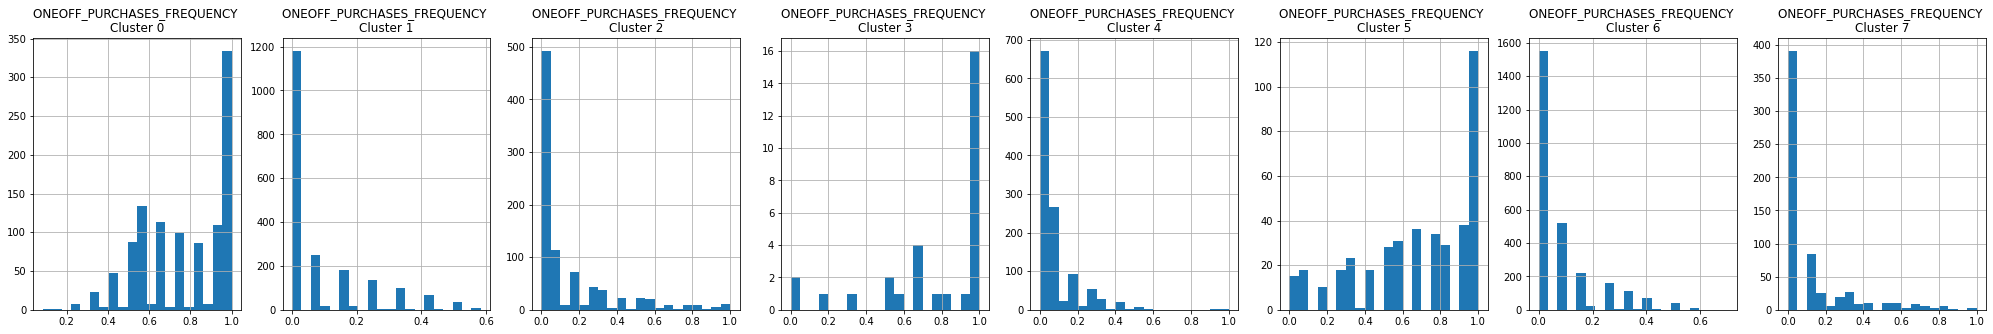

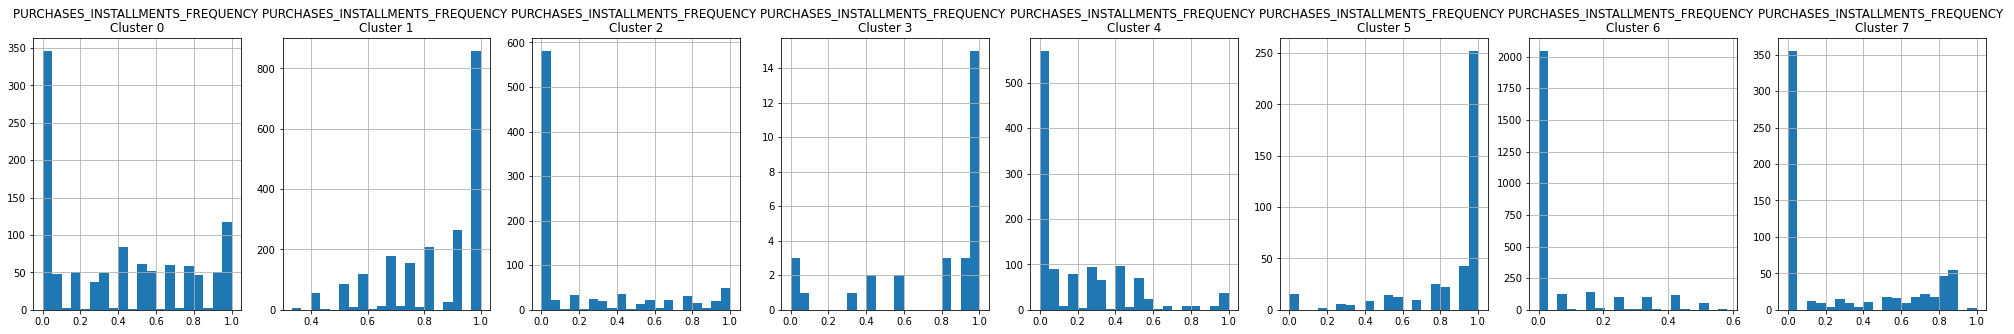

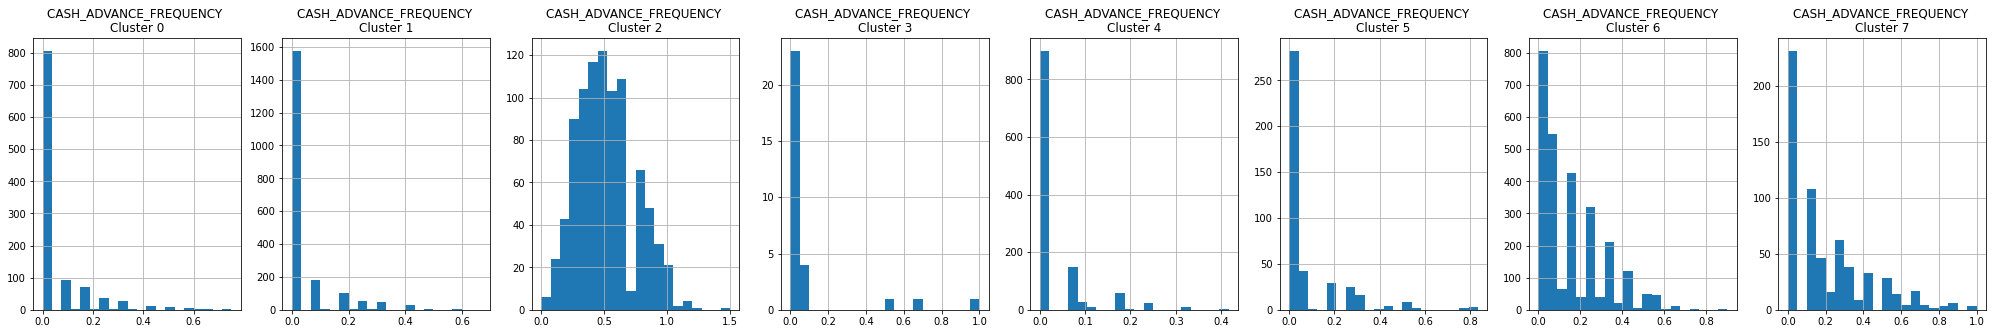

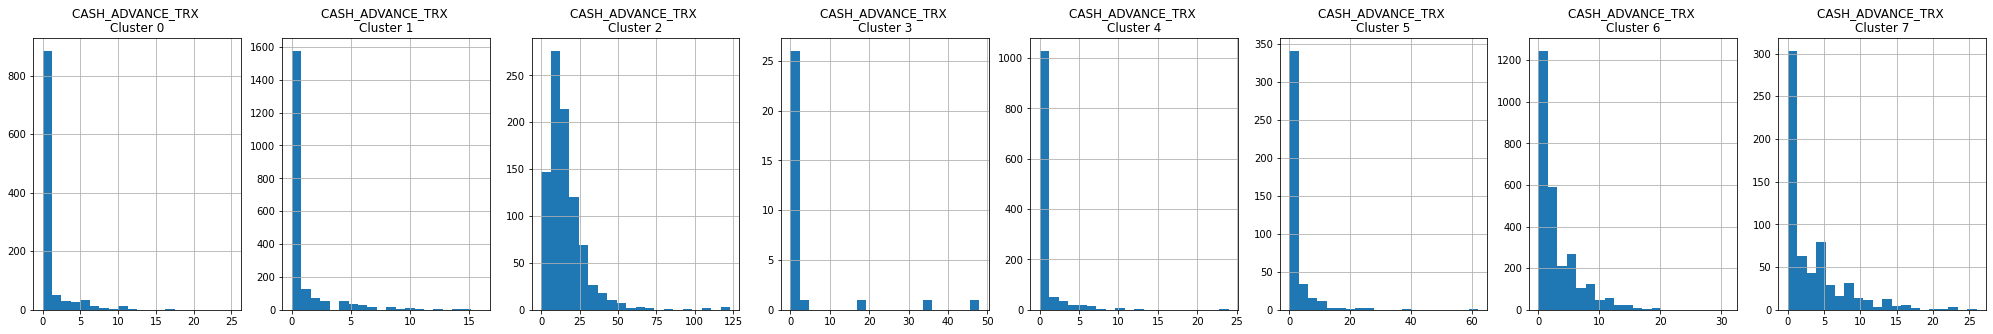

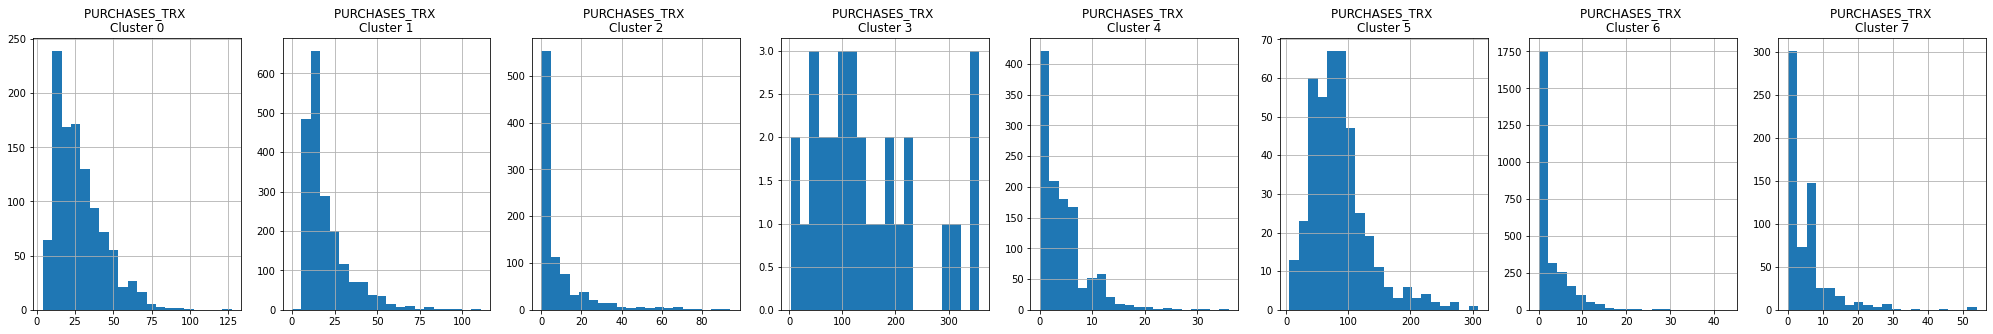

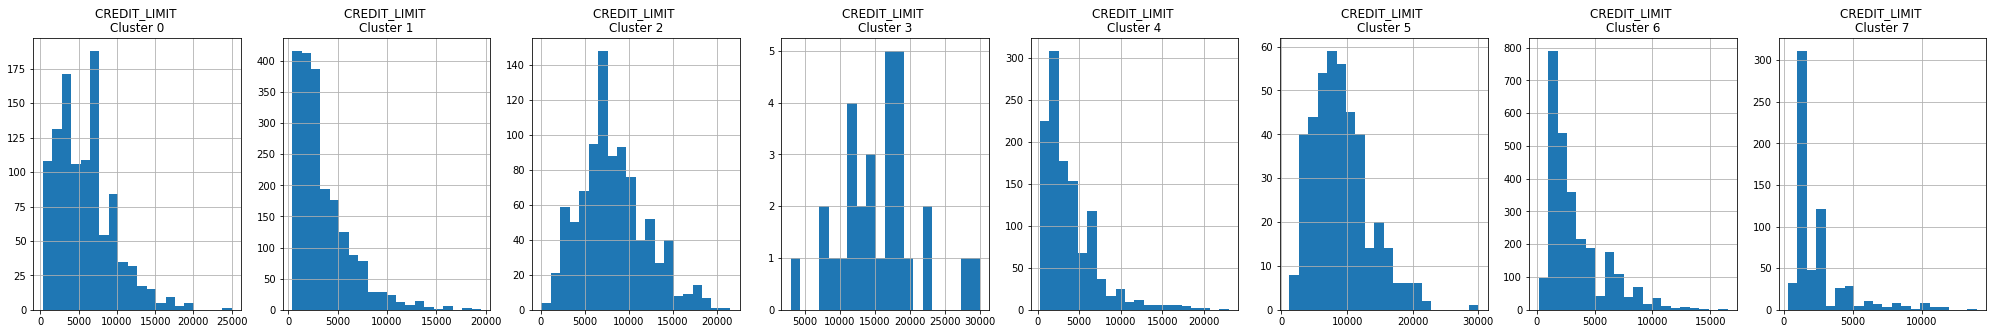

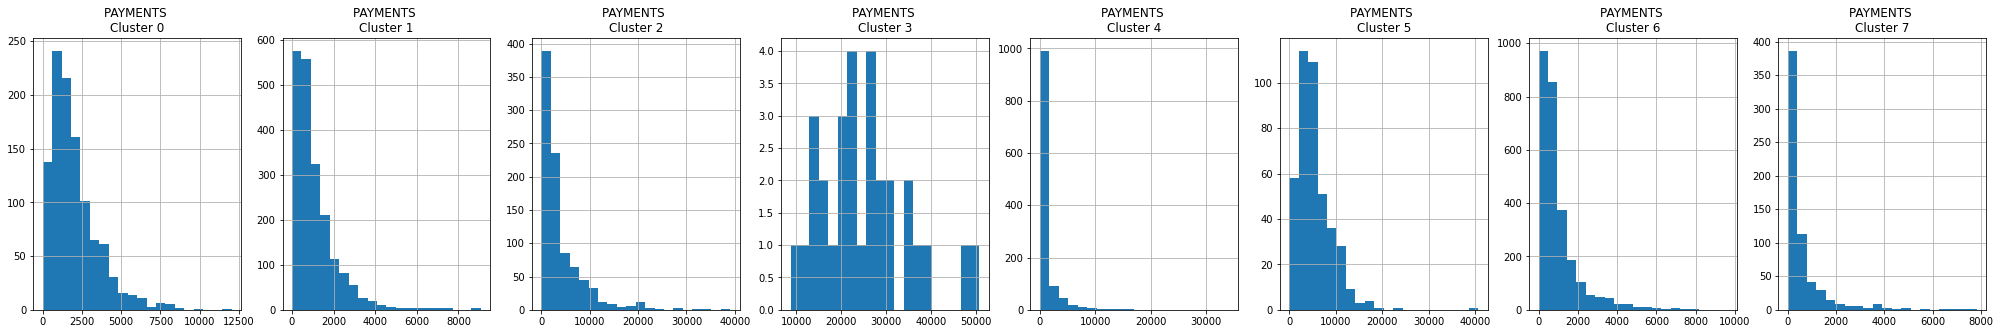

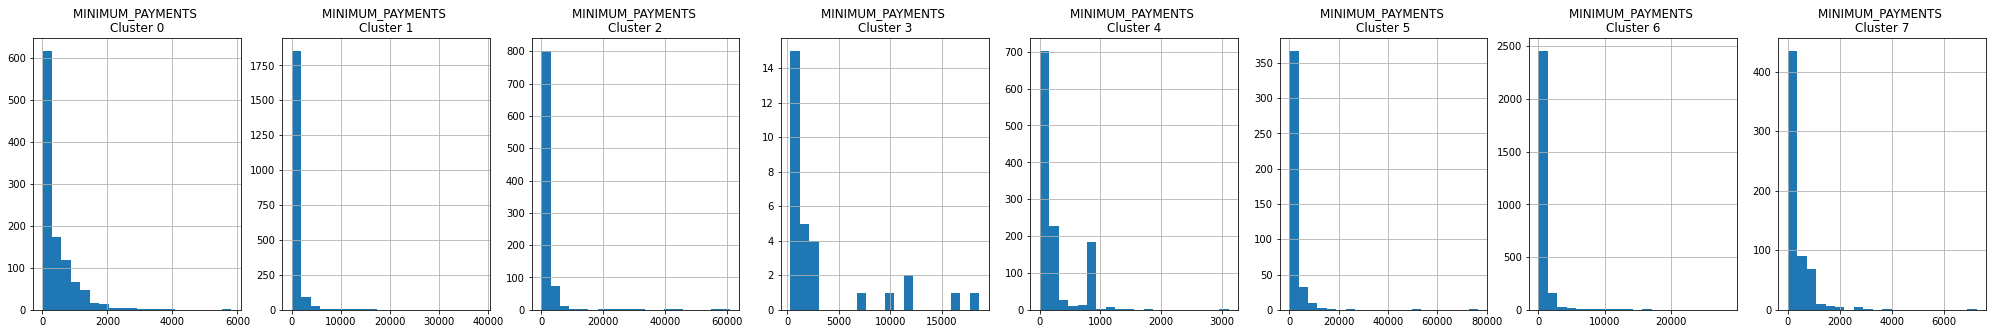

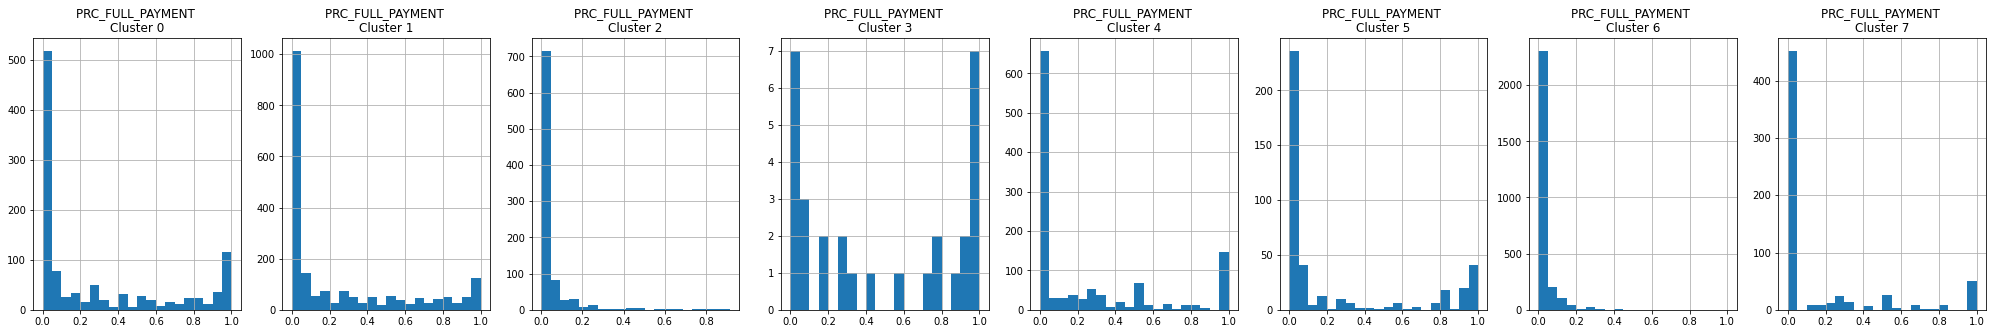

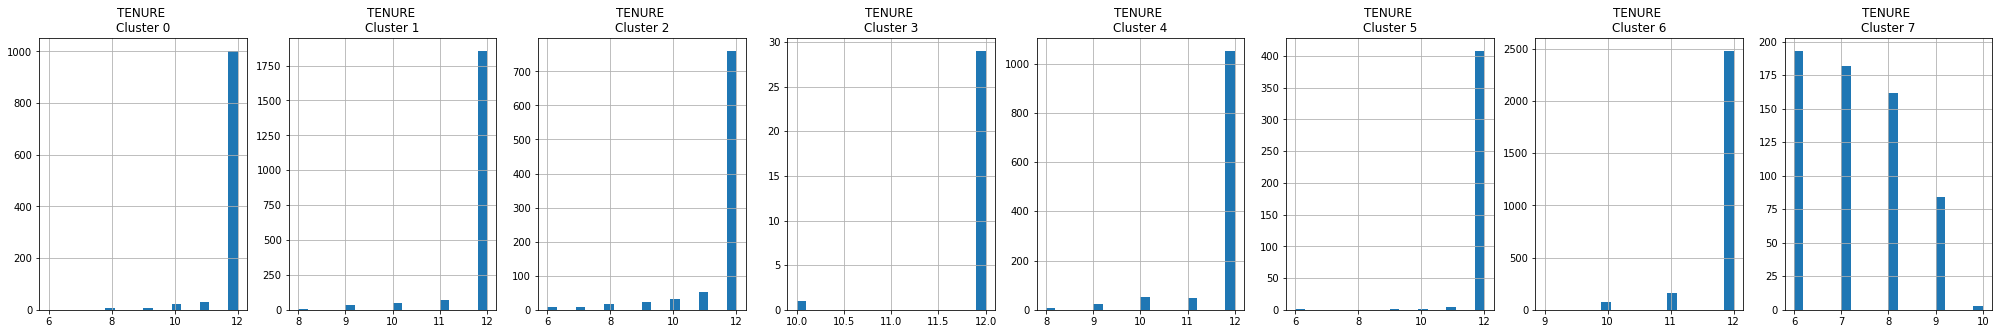

In [41]:
from IPython.core.pylabtools import figsize
# Gerando um histograma utilizando os grupos para facilitar novas analises
for i in creditcards_df.columns:  # Percorrendo inicialmente neste for cada uma das colunas
  plt.figure(figsize=(35,5))
  for j in range(8): # Percorrendo 8x cada um dos atribusots dos clusters separados pelos grupos
    plt.subplot(1, 8, j + 1)  # Tera uma linha e 8 colunas, cada linha terá 8 gráficos
    cluster = creditcards_df_cluster[creditcards_df_cluster['cluster'] == j]  # a variavel "j" varia de 0 até 7 para coletarmos os registros específicos de cada grupo
    cluster[i].hist(bins = 20)  # número de divisões igual a 20 (bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [42]:
# Criando uma codificação adicional simulado como se fosse ser enviados essa base de dados para o pessoal do marketing para serem feitas as campanhas
credit_ordered = creditcards_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
6329,4028.714266,1.000000,3585.75,3488.42,97.33,478.678942,0.333333,0.333333,0.083333,0.083333,1,17,6500.0,6869.557475,976.009981,0.100000,12,0
1290,2006.218006,1.000000,4572.63,3484.50,1088.13,0.000000,0.500000,0.416667,0.250000,0.000000,0,28,6500.0,1670.202477,1842.365907,0.000000,12,0
1288,5858.617133,1.000000,2761.41,2484.65,276.76,0.000000,1.000000,0.666667,0.666667,0.000000,0,24,11000.0,1919.207449,1365.627377,0.000000,12,0
1287,396.419487,1.000000,4349.34,4349.34,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,14,5000.0,4381.453625,163.370313,1.000000,12,0
4088,375.583779,0.818182,1567.40,1567.40,0.00,830.455855,0.583333,0.583333,0.000000,0.083333,1,14,2500.0,2695.758540,188.250177,0.666667,12,0


In [43]:
# Checando os 5 ultimos valores
credit_ordered.tail()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
8222,1058.726643,0.571429,191.00,191.00,0.00,1639.830365,0.142857,0.142857,0.000000,0.142857,2,2,2000.0,171.044001,354.529079,0.0,7,7
5210,8.285344,0.142857,72.52,72.52,0.00,0.000000,0.142857,0.142857,0.000000,0.000000,0,1,3000.0,0.000000,864.206542,0.0,7,7
5220,2517.382470,1.000000,320.00,320.00,0.00,2357.815693,0.166667,0.166667,0.000000,0.500000,5,2,2500.0,552.896593,978.223000,0.0,6,7
5053,1938.576334,1.000000,333.54,310.19,23.35,2738.946605,0.571429,0.428571,0.142857,0.857143,7,4,2000.0,867.233681,586.992382,0.0,7,7
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.0,6,7


In [44]:
# Salvando o arquivo em um CSV
credit_ordered.to_csv('cluster.csv')

## Aplicação de PCA (principal component analysis) e visualização dos resultados


In [45]:
# Criando uma variavel PCA

pca = PCA(n_components=2) # aqui definimos quantos componentes queremos criar
principal_comp = pca.fit_transform(creditcards_df_scaled)
principal_comp

array([[-1.68221955, -1.07645137],
       [-1.13829499,  2.5064903 ],
       [ 0.96967827, -0.38342037],
       ...,
       [-0.92620165, -1.81080984],
       [-2.33655062, -0.65798551],
       [-0.55642658, -0.40042232]])

In [46]:
# Criando um novo dataframe para colonar na 3ª coluna onde cada um dos clusters pertence
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2']) # serão os nomes das colunas
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076451
1,-1.138295,2.506490
2,0.969678,-0.383420
3,-0.873625,0.043143
4,-1.599433,-0.688578


In [47]:
# Concatenação
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)

In [48]:
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076451,6
1,-1.138295,2.506490,2
2,0.969678,-0.383420,0
3,-0.873625,0.043143,6
4,-1.599433,-0.688578,6


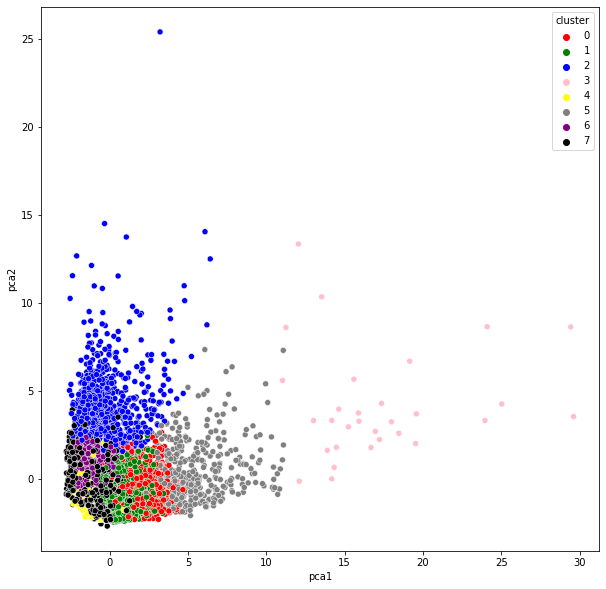

In [49]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y='pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black' ])

## Autoencoders - Intuição

* Versão comprimida da informação na camada do meio (codificação)
* Funcionam se existir correlação entre os dados de entrada (resultados ruins se os dados de entrada são todos independetes)